In [5]:
#Week- 5 ( Classification Challenge)

In [6]:
#Importing all necessary libraries that are needed for the Classification challenge
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

In [7]:
#Importing my data set and viewing first five columns of the dataset.
synthetic_data = pd.read_csv('C:/Users/Karan/week-5-assignment-classification-challenge/dataset/synthetic_data_training.csv')
synthetic_data.head(5)


,gender,age,bmi,systolic_bp,diastolic_bp,exercise_frequency,smoker,family_history,diet_quality,us_state,shoe_size,cholesterol_level,has_disease
0,Male,53,19.138668,121.898174,61.773357,NaN,1.0,1.000000,Poor,NY,12.365815,160.204426,0
1,Female,23,32.498117,154.821812,68.959128,Regularly,1.0,0.497027,Average,OH,10.585105,145.484203,0
2,Male,27,33.151563,185.758938,113.805127,Regularly,1.0,0.000000,NaN,FL,12.346710,206.106997,1
3,Female,32,37.248601,163.894943,57.066786,Frequently,0.0,1.000000,Poor,OH,7.997821,257.131324,1
4,Female,18,26.668744,117.623795,93.728305,NaN,0.0,0.000000,Good,NY,11.679335,249.370450,0


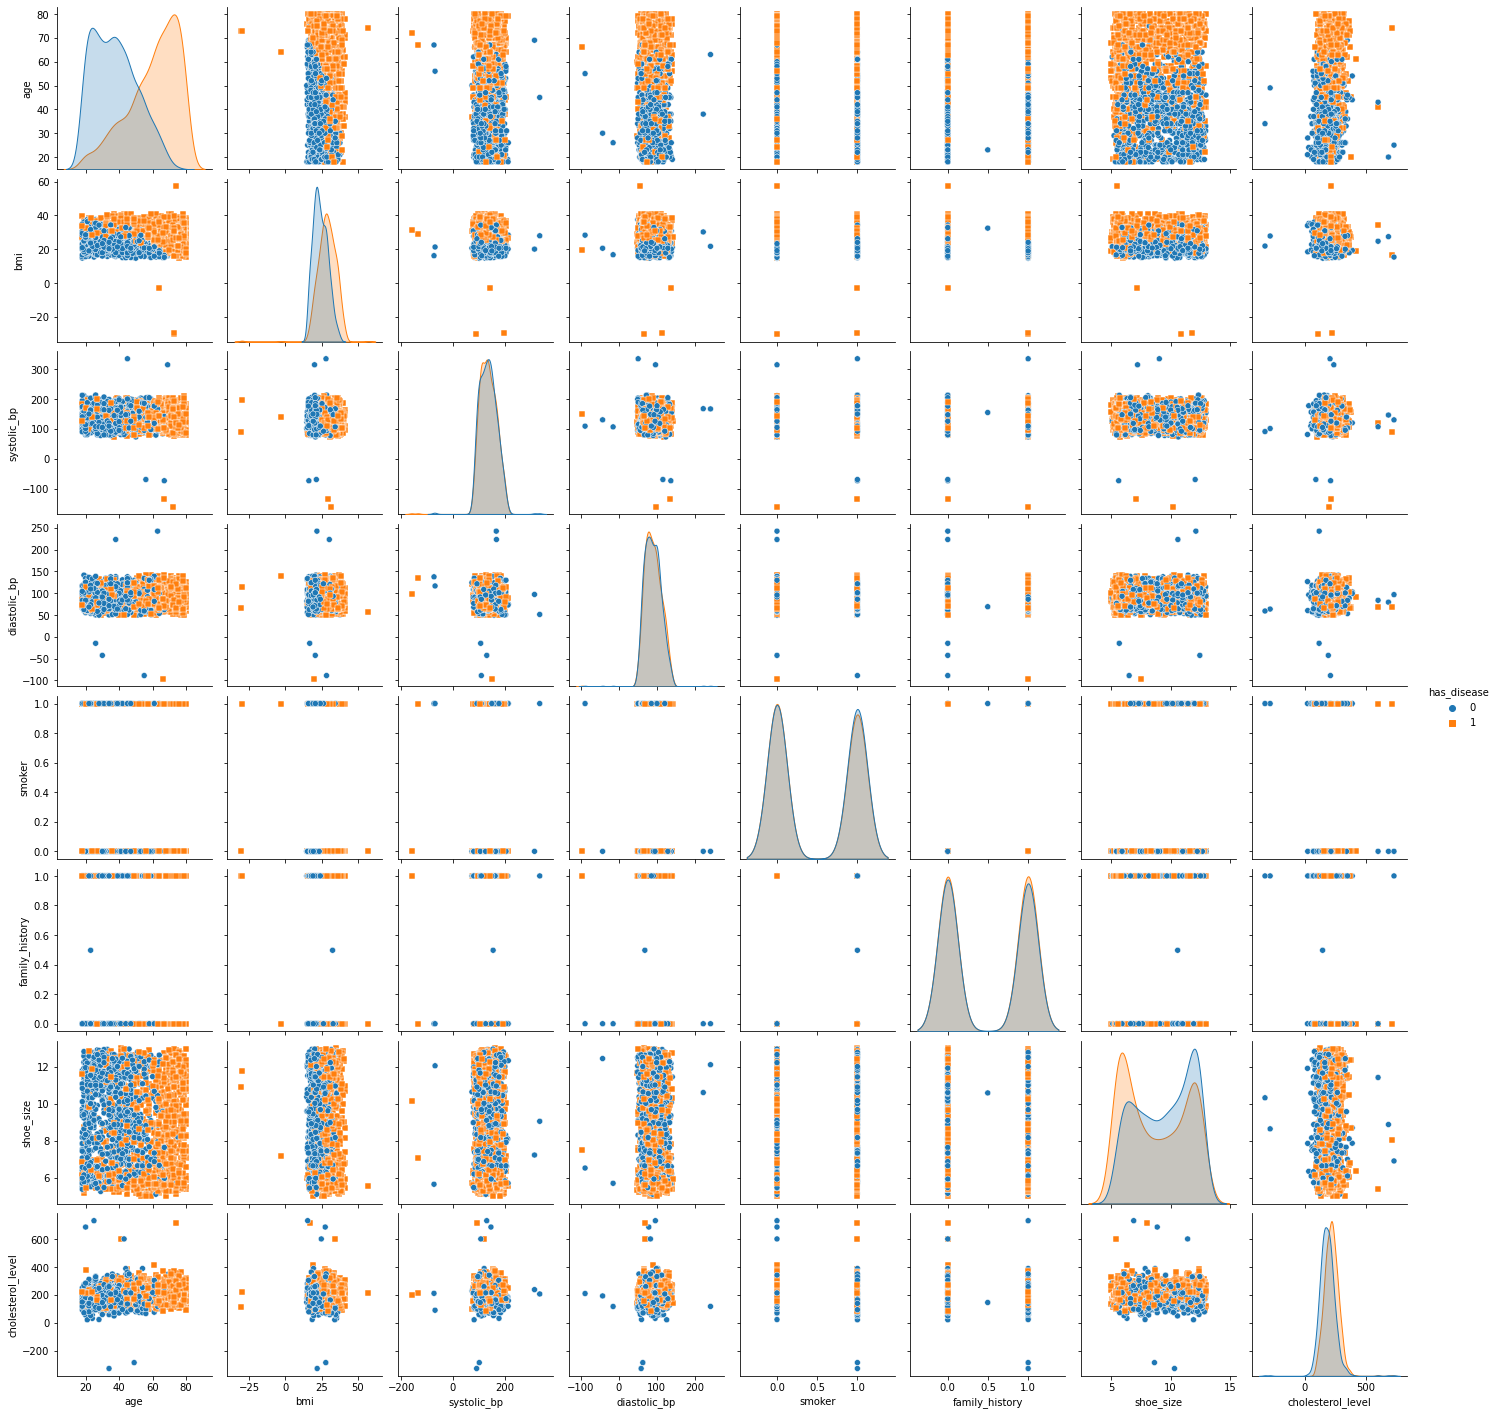

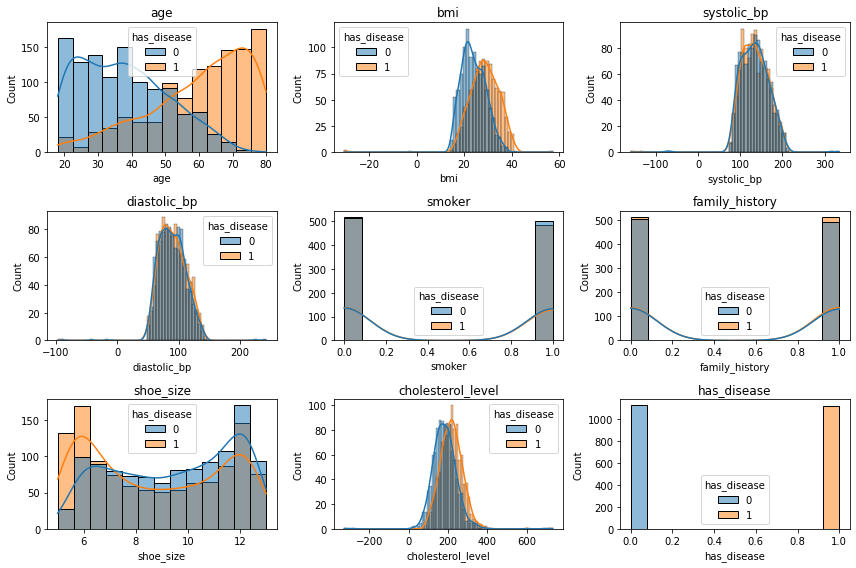

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numeric features
numeric_features = synthetic_data.select_dtypes(include=[np.number])

# Create a pairplot for scatter plots 
sns.pairplot(synthetic_data, hue='has_disease', diag_kind='kde', markers=['o', 's']) #pairplot 
#diag_kind='kde' parameter adds kernel density estimates on the diagonal.(I didn't knew this earlier)
plt.show() #seaborns pairplot is used to create scatterplots for all numeric features

# Create histograms for numeric features
plt.figure(figsize=(12, 8))
for i, col in enumerate(numeric_features.columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(data=synthetic_data, x=col, hue='has_disease', kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()


In [9]:
# Check for missing values in the synthetic_data DataFrame
missing_values = synthetic_data.isnull().sum()
print("Missing Values:")
print(missing_values[missing_values > 0])

# Handle missing values
# For numeric features, impute with mean; for categorical features, impute with mode
numeric_features = synthetic_data.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = synthetic_data.select_dtypes(exclude=[np.number]).columns.tolist()

for col in numeric_features:
    synthetic_data[col].fillna(synthetic_data[col].mean(), inplace=True)

for col in categorical_features:
    synthetic_data[col].fillna(synthetic_data[col].mode()[0], inplace=True)

# Verify that there are no more missing values
missing_values = synthetic_data.isnull().sum()
print("\nMissing Values After Imputation:")
print(missing_values[missing_values > 0])


Missing Values:
bmi                   223
systolic_bp           233
diastolic_bp          233
exercise_frequency    228
smoker                231
family_history        231
diet_quality          215
cholesterol_level     236
dtype: int64

Missing Values After Imputation:
Series([], dtype: int64)


In [10]:
# Verify that there are no more missing values
missing_values_after_imputation = synthetic_data.isnull().sum()
if missing_values_after_imputation.sum() == 0:
    print("No missing values in the dataset after imputation.")
else:
    print("There are still missing values in the dataset after imputation.")
    print(missing_values_after_imputation[missing_values_after_imputation > 0])

No missing values in the dataset after imputation.


In [11]:
print(synthetic_data).head(5)

      gender  age        bmi  systolic_bp  diastolic_bp exercise_frequency  \
0       Male   53  19.138668   121.898174     61.773357         Frequently   
1     Female   23  32.498117   154.821812     68.959128          Regularly   
2       Male   27  33.151563   185.758938    113.805127          Regularly   
3     Female   32  37.248601   163.894943     57.066786         Frequently   
4     Female   18  26.668744   117.623795     93.728305         Frequently   
...      ...  ...        ...          ...           ...                ...   
2245  Female   47  19.189744   125.759809     95.769904              Never   
2246  Female   34  24.080828   109.501791     86.121473             Rarely   
2247  Female   67  38.920518   102.963668     70.154491          Regularly   
2248  Female   64  36.417178   143.659078     66.396337         Frequently   
2249    Male   47  20.600617   177.450584    101.038767             Rarely   

      smoker  family_history diet_quality us_state  shoe_size  

AttributeError: 'NoneType' object has no attribute 'head'

In [12]:
# Want to view row 8
row_8_data = synthetic_data.iloc[8, :]  # Select row 8, all columns

# Printing the row data with headings
print("Data in row 10:")
print(row_8_data)

#By this I took an example of a specific row from the dataset and checked if the missing value is filled.

Data in row 10:
gender                      Male
age                           44
bmi                    18.379879
systolic_bp            91.679957
diastolic_bp           89.829366
exercise_frequency         Never
smoker                       1.0
family_history               1.0
diet_quality                Good
us_state                      FL
shoe_size              11.906755
cholesterol_level     152.115071
has_disease                    0
Name: 8, dtype: object


In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

#My missing values has been taken care in above steps

# Define feature columns (X) and target column (y)
X = synthetic_data.drop('has_disease', axis=1)
y = synthetic_data['has_disease']

# Split the data into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# Define preprocessing for numeric and categorical features
numeric_features = X.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = X.select_dtypes(exclude=[np.number]).columns.tolist()

numeric_transformer = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', StandardScaler())
    ]
)

categorical_transformer = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ]
)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Create a logistic regression classifier 
classifier = LogisticRegression(random_state=42)

# Creating a pipeline that includes preprocessing and the classifier
model = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('classifier', classifier)
    ]
)

# Train the model on the training data
model.fit(X_train, y_train)

# Evaluate the model on the validation set
y_pred_valid = model.predict(X_valid)
f1_score_valid = f1_score(y_valid, y_pred_valid)
print("F1-score on validation set:", f1_score_valid)
f1_score_scenario_1 = f1_score_valid




F1-score on validation set: 0.84375


In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier  # Import Random Forest Classifier
from sklearn.metrics import f1_score

# Define feature columns (X) and target column (y)
X = synthetic_data.drop('has_disease', axis=1)
y = synthetic_data['has_disease']

# Split the data into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# Define preprocessing for numeric and categorical features
numeric_features = X.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = X.select_dtypes(exclude=[np.number]).columns.tolist()

numeric_transformer = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', StandardScaler())
    ]
)

categorical_transformer = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ]
)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Create a Random Forest Classifier 
classifier = RandomForestClassifier(n_estimators=100, random_state=42)  # You can adjust the number of estimators as needed

# Creating a pipeline that includes preprocessing and the classifier
model = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('classifier', classifier)
    ]
)

# Train the model on the training data
model.fit(X_train, y_train)

# Evaluate the model on the validation set
y_pred_valid = model.predict(X_valid)
f1_score_valid = f1_score(y_valid, y_pred_valid)
print("F1-score on validation set:", f1_score_valid)


F1-score on validation set: 0.8808988764044943


In [15]:
# List of columns to drop
columns_to_drop = ['shoe_size', 'us_state']

# Create a new DataFrame with the specified columns removed
synthetic_data_reduced = synthetic_data.drop(columns=columns_to_drop)

# Verify the new DataFrame
print(synthetic_data_reduced.head())


   gender  age        bmi  systolic_bp  diastolic_bp exercise_frequency  \
0    Male   53  19.138668   121.898174     61.773357         Frequently   
1  Female   23  32.498117   154.821812     68.959128          Regularly   
2    Male   27  33.151563   185.758938    113.805127          Regularly   
3  Female   32  37.248601   163.894943     57.066786         Frequently   
4  Female   18  26.668744   117.623795     93.728305         Frequently   

   smoker  family_history diet_quality  cholesterol_level  has_disease  
0     1.0        1.000000         Poor         160.204426            0  
1     1.0        0.497027      Average         145.484203            0  
2     1.0        0.000000         Poor         206.106997            1  
3     0.0        1.000000         Poor         257.131324            1  
4     0.0        0.000000         Good         249.370450            0  


In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

# Define feature columns (X) and target column (y)
X = synthetic_data_reduced.drop('has_disease', axis=1)
y = synthetic_data_reduced['has_disease']

# Split the data into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# Define preprocessing for numeric and categorical features
numeric_features = X.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = X.select_dtypes(exclude=[np.number]).columns.tolist()

numeric_transformer = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', StandardScaler())
    ]
)

categorical_transformer = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ]
)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Create a logistic regression classifier 
classifier = LogisticRegression(random_state=42)

# Creating a pipeline that includes preprocessing and the classifier
model = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('classifier', classifier)
    ]
)

# Train the model on the training data
model.fit(X_train, y_train)

# Evaluate the model on the validation set
y_pred_valid = model.predict(X_valid)
f1_score_valid = f1_score(y_valid, y_pred_valid)
print("F1-score on validation set:", f1_score_valid)


F1-score on validation set: 0.84304932735426


In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier  # Import Random Forest Classifier
from sklearn.metrics import f1_score

# Define feature columns (X) and target column (y)
X = synthetic_data_reduced.drop('has_disease', axis=1)
y = synthetic_data_reduced['has_disease']

# Split the data into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# Define preprocessing for numeric and categorical features
numeric_features = X.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = X.select_dtypes(exclude=[np.number]).columns.tolist()

numeric_transformer = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', StandardScaler())
    ]
)

categorical_transformer = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ]
)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Create a Random Forest Classifier 
classifier = RandomForestClassifier(n_estimators=100, random_state=42)  # You can adjust the number of estimators as needed

# Creating a pipeline that includes preprocessing and the classifier
model = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('classifier', classifier)
    ]
)

# Train the model on the training data
model.fit(X_train, y_train)

# Evaluate the model on the validation set
y_pred_valid = model.predict(X_valid)
f1_score_valid = f1_score(y_valid, y_pred_valid)
print("F1-score on validation set:", f1_score_valid)


F1-score on validation set: 0.8512585812356981


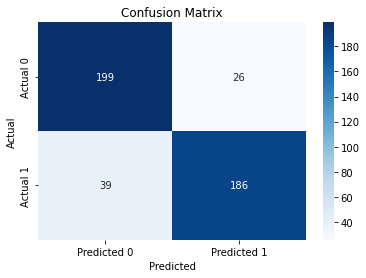

In [21]:
# Confusion Matrix Visualization
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_valid, y_pred_valid)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
#In summary of above code

#TN: True Negatives - Correctly predicted "0" when it was "0."
#FP: False Positives - Incorrectly predicted "1" when it was "0."
#FN: False Negatives - Incorrectly predicted "0" when it was "1."
#TP: True Positives - Correctly predicted "1" when it was "1."

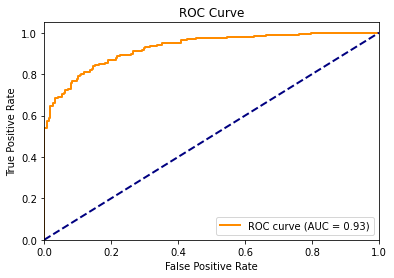

In [16]:
from sklearn.metrics import roc_curve, roc_auc_score

y_probs_valid = model.predict_proba(X_valid)[:, 1]  # Get predicted probabilities for class 1
fpr, tpr, thresholds = roc_curve(y_valid, y_probs_valid)
auc = roc_auc_score(y_valid, y_probs_valid)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

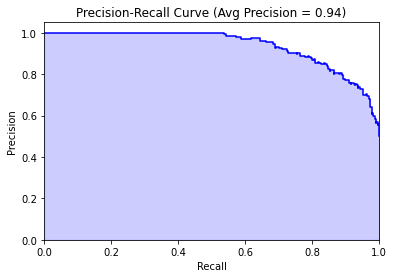

In [17]:
# Precision-Recall Curve
from sklearn.metrics import precision_recall_curve, average_precision_score

precision, recall, thresholds = precision_recall_curve(y_valid, y_probs_valid)
avg_precision = average_precision_score(y_valid, y_probs_valid)

plt.figure()
plt.step(recall, precision, color='b', where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title(f'Precision-Recall Curve (Avg Precision = {avg_precision:.2f})')
plt.show()

In [2]:
from sklearn.ensemble import RandomForestClassifier

# Assuming you have already split your dataset into X_train and y_train
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model to your training data
model.fit(X_train, y_train)

# Now, you can use the trained model for prediction, e.g., on a test set (X_test)
y_pred = model.predict(X_test)



NameError: name 'X_train' is not defined

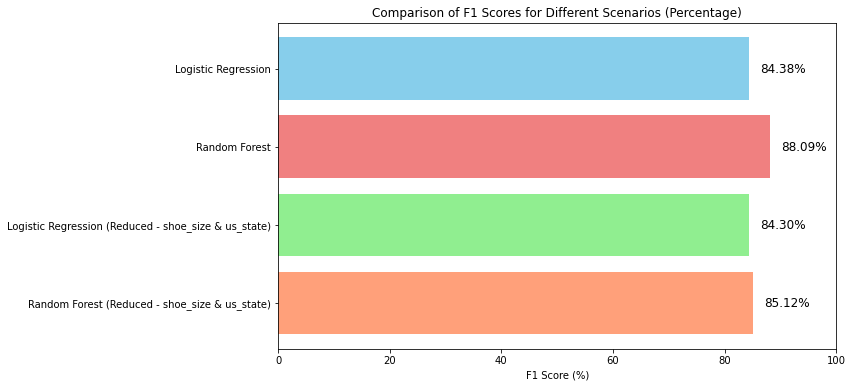

In [25]:
import matplotlib.pyplot as plt

# F1 scores for each scenario (actual values)
f1_score_scenario_1 = 0.84375
f1_score_scenario_2 = 0.88089
f1_score_scenario_3 = 0.84304
f1_score_scenario_4 = 0.85125

# Convert F1 scores to percentages
f1_percentage_scenario_1 = f1_score_scenario_1 * 100
f1_percentage_scenario_2 = f1_score_scenario_2 * 100
f1_percentage_scenario_3 = f1_score_scenario_3 * 100
f1_percentage_scenario_4 = f1_score_scenario_4 * 100

# Scenario labels
scenarios = ["Logistic Regression", "Random Forest", "Logistic Regression (Reduced - shoe_size & us_state)", "Random Forest (Reduced - shoe_size & us_state)"]

# Define colors for each scenario
colors = ["skyblue", "lightcoral", "lightgreen", "lightsalmon"]

# Create a bar chart with different colors
plt.figure(figsize=(10, 6))
bars = plt.barh(scenarios, [f1_percentage_scenario_1, f1_percentage_scenario_2, f1_percentage_scenario_3, f1_percentage_scenario_4], color=colors)
plt.xlabel('F1 Score (%)')
plt.title('Comparison of F1 Scores for Different Scenarios (Percentage)')
plt.xlim(0, 100)  # Set the x-axis limits to 0-100%
plt.gca().invert_yaxis()  # Invert the y-axis to display the highest score at the top

# Add F1 score values on top of the bars with different colors
for bar, v in zip(bars, [f1_percentage_scenario_1, f1_percentage_scenario_2, f1_percentage_scenario_3, f1_percentage_scenario_4]):
    plt.text(bar.get_width() + 2, bar.get_y() + bar.get_height() / 2, f'{v:.2f}%', color='black', va='center', fontsize=12)

plt.show()


In [18]:
import pandas as pd

# Load the test dataset
synthetic_data_test = pd.read_csv('C:/Users/Karan/week-5-data-preparation-KaranShah1/synthetic_data_test.csv') 

In [19]:

# Define feature columns (X_test) for the test set
X_test = synthetic_data_test  # All columns except the target 'has_disease'

# Used my trained model to make predictions on the test set
y_pred_test = model.predict(X_test)


In [20]:
import pandas as pd

# 'y_pred_test' contains my predictions
answers_df = pd.DataFrame({'has_disease': y_pred_test})

# Saved my predictions to 'answers.csv'
answers_df.to_csv('answers.csv', index=False)
